In [1]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillaget",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4500 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [5]:
len(dataset)

141

In [6]:
for image_batch, label_batch in  dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 1 2 0 2 0 1 1 1 1 1 2 0 2 1 1 1 1 2 1 0 1 2 1 1 1 1 2 0]


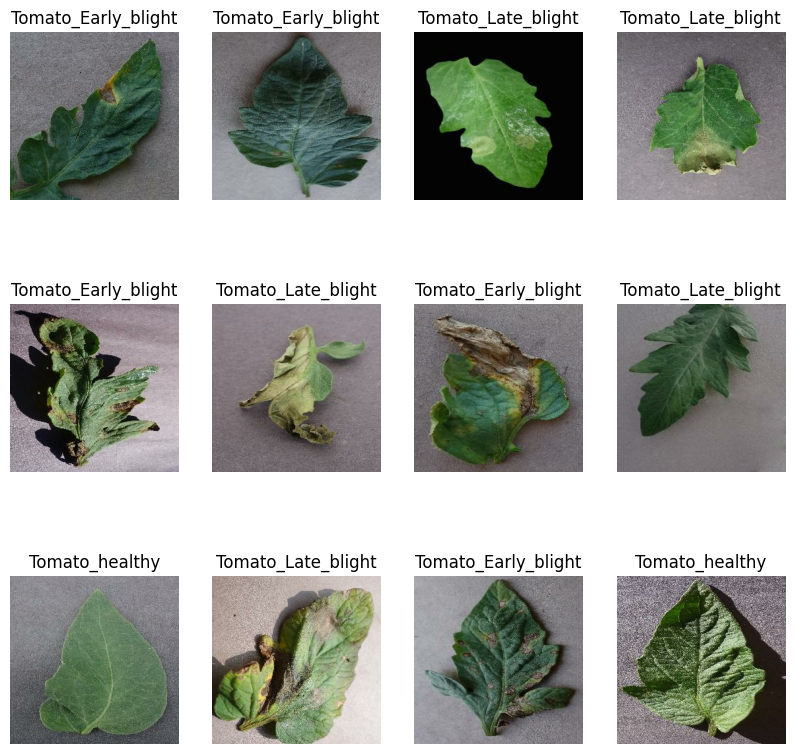

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in  dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

141

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size


112.80000000000001

In [10]:
train_ds = dataset.take(112)
len(train_ds)

112

In [12]:
test_ds = dataset.skip(112)
len(test_ds)

29

In [13]:
val_size=0.1
len(dataset)*val_size

14.100000000000001

In [14]:
val_ds = test_ds.take(14)
len(val_ds)

14

In [15]:
test_ds = test_ds.skip(14)
len(test_ds)

15

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
    return 

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

112

In [19]:
len(val_ds)

14

In [20]:
len(test_ds)

15

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
112/112 [==============================] - 144s 1s/step - loss: 0.7101 - accuracy: 0.6716 - val_loss: 0.7378 - val_accuracy: 0.7009
Epoch 2/50
112/112 [==============================] - 125s 1s/step - loss: 0.3643 - accuracy: 0.8435 - val_loss: 0.3030 - val_accuracy: 0.8549
Epoch 3/50
112/112 [==============================] - 120s 1s/step - loss: 0.3647 - accuracy: 0.8494 - val_loss: 0.3203 - val_accuracy: 0.8683
Epoch 4/50
112/112 [==============================] - 121s 1s/step - loss: 0.3279 - accuracy: 0.8670 - val_loss: 0.2654 - val_accuracy: 0.8951
Epoch 5/50
112/112 [==============================] - 121s 1s/step - loss: 0.2596 - accuracy: 0.8922 - val_loss: 0.1888 - val_accuracy: 0.9196
Epoch 6/50
112/112 [==============================] - 124s 1s/step - loss: 0.2216 - accuracy: 0.9071 - val_loss: 0.2938 - val_accuracy: 0.8728
Epoch 7/50
112/112 [==============================] - 124s 1s/step - loss: 0.2271 - accuracy: 0.9009 - val_loss: 0.2172 - val_accuracy: 0.8929

In [28]:
scores = model.evaluate(test_ds)

15/15 [==============================] - 13s 248ms/step - loss: 0.0394 - accuracy: 0.9958


In [30]:
scores



[0.03944210708141327, 0.9958333373069763]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 112}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
history.history['loss']

[0.71014004945755,
 0.3643060624599457,
 0.36471930146217346,
 0.3278841972351074,
 0.2595600485801697,
 0.22162792086601257,
 0.2270634025335312,
 0.20300763845443726,
 0.17309950292110443,
 0.15706883370876312,
 0.1849697381258011,
 0.12572675943374634,
 0.11623707413673401,
 0.11353698372840881,
 0.08160022646188736,
 0.054218590259552,
 0.21327871084213257,
 0.040967974811792374,
 0.0655890628695488,
 0.06214210018515587,
 0.030367577448487282,
 0.022898318246006966,
 0.03619762510061264,
 0.08816912770271301,
 0.0204941313713789,
 0.03244277089834213,
 0.010078218765556812,
 0.03636568784713745,
 0.03806621581315994,
 0.06505344808101654,
 0.0077858977019786835,
 0.04370758682489395,
 0.01662294752895832,
 0.0037573128938674927,
 0.0006330981850624084,
 0.0002839878434315324,
 0.00016243952268268913,
 0.00011408554564695805,
 9.088832302950323e-05,
 7.428059325320646e-05,
 6.189743726281449e-05,
 5.2784333092859015e-05,
 4.5158929424360394e-05,
 3.925355485989712e-05,
 3.457436832

In [35]:
len(history.history['loss'])

50

In [36]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.71014004945755,
 0.3643060624599457,
 0.36471930146217346,
 0.3278841972351074,
 0.2595600485801697]

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

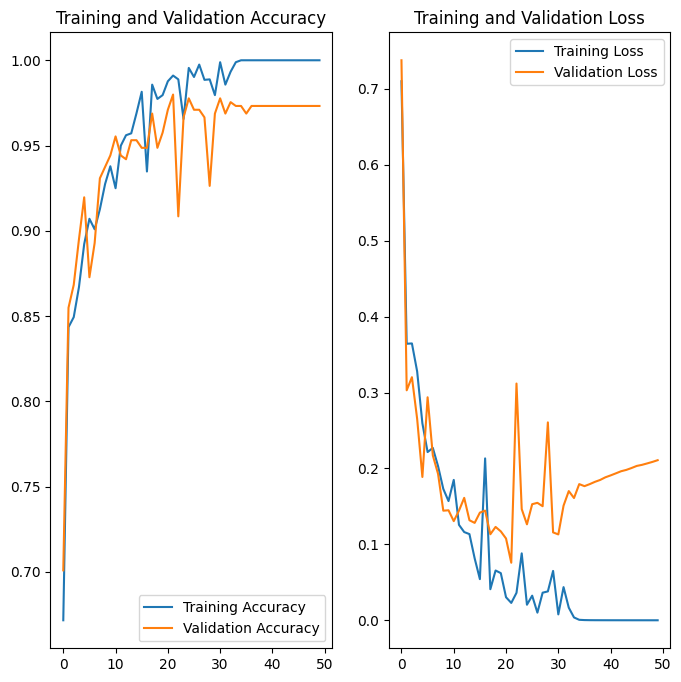

In [38]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

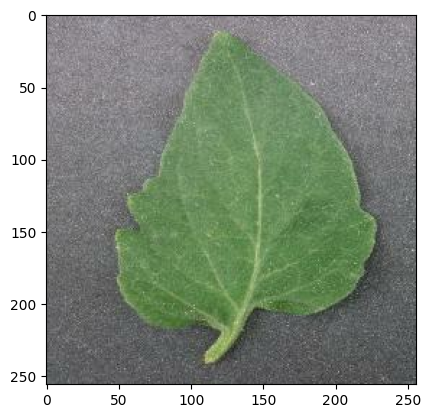

In [39]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

In [40]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy().astype('uint8'))

[[[147 142 148]
  [133 128 134]
  [141 136 142]
  ...
  [143 138 144]
  [158 153 159]
  [142 137 143]]

 [[131 126 132]
  [151 146 152]
  [127 122 128]
  ...
  [151 146 152]
  [149 144 150]
  [139 134 140]]

 [[132 127 133]
  [115 110 116]
  [161 156 162]
  ...
  [137 132 138]
  [155 150 156]
  [133 128 134]]

 ...

 [[ 91  95  96]
  [101 105 106]
  [ 99 103 104]
  ...
  [ 78  82  83]
  [ 82  86  87]
  [ 74  78  79]]

 [[ 93  97  98]
  [100 104 105]
  [ 97 101 102]
  ...
  [109 113 114]
  [ 97 101 102]
  [ 81  85  86]]

 [[ 93  97  98]
  [ 96 100 101]
  [ 92  96  97]
  ...
  [123 127 128]
  [ 92  96  97]
  [ 75  79  80]]]


first image to predict
first image's actual label: Tomato_Early_blight
1/1 [==============================] - 0s 230ms/step
predicted label: Tomato_Early_blight


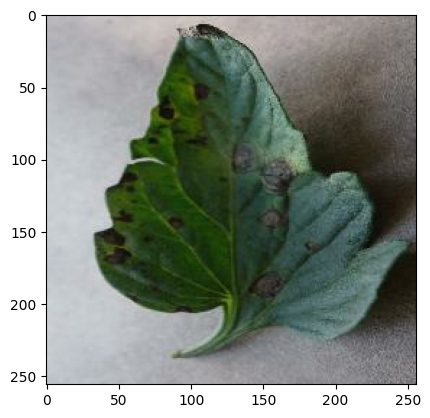

In [42]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)#Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 30ms/step


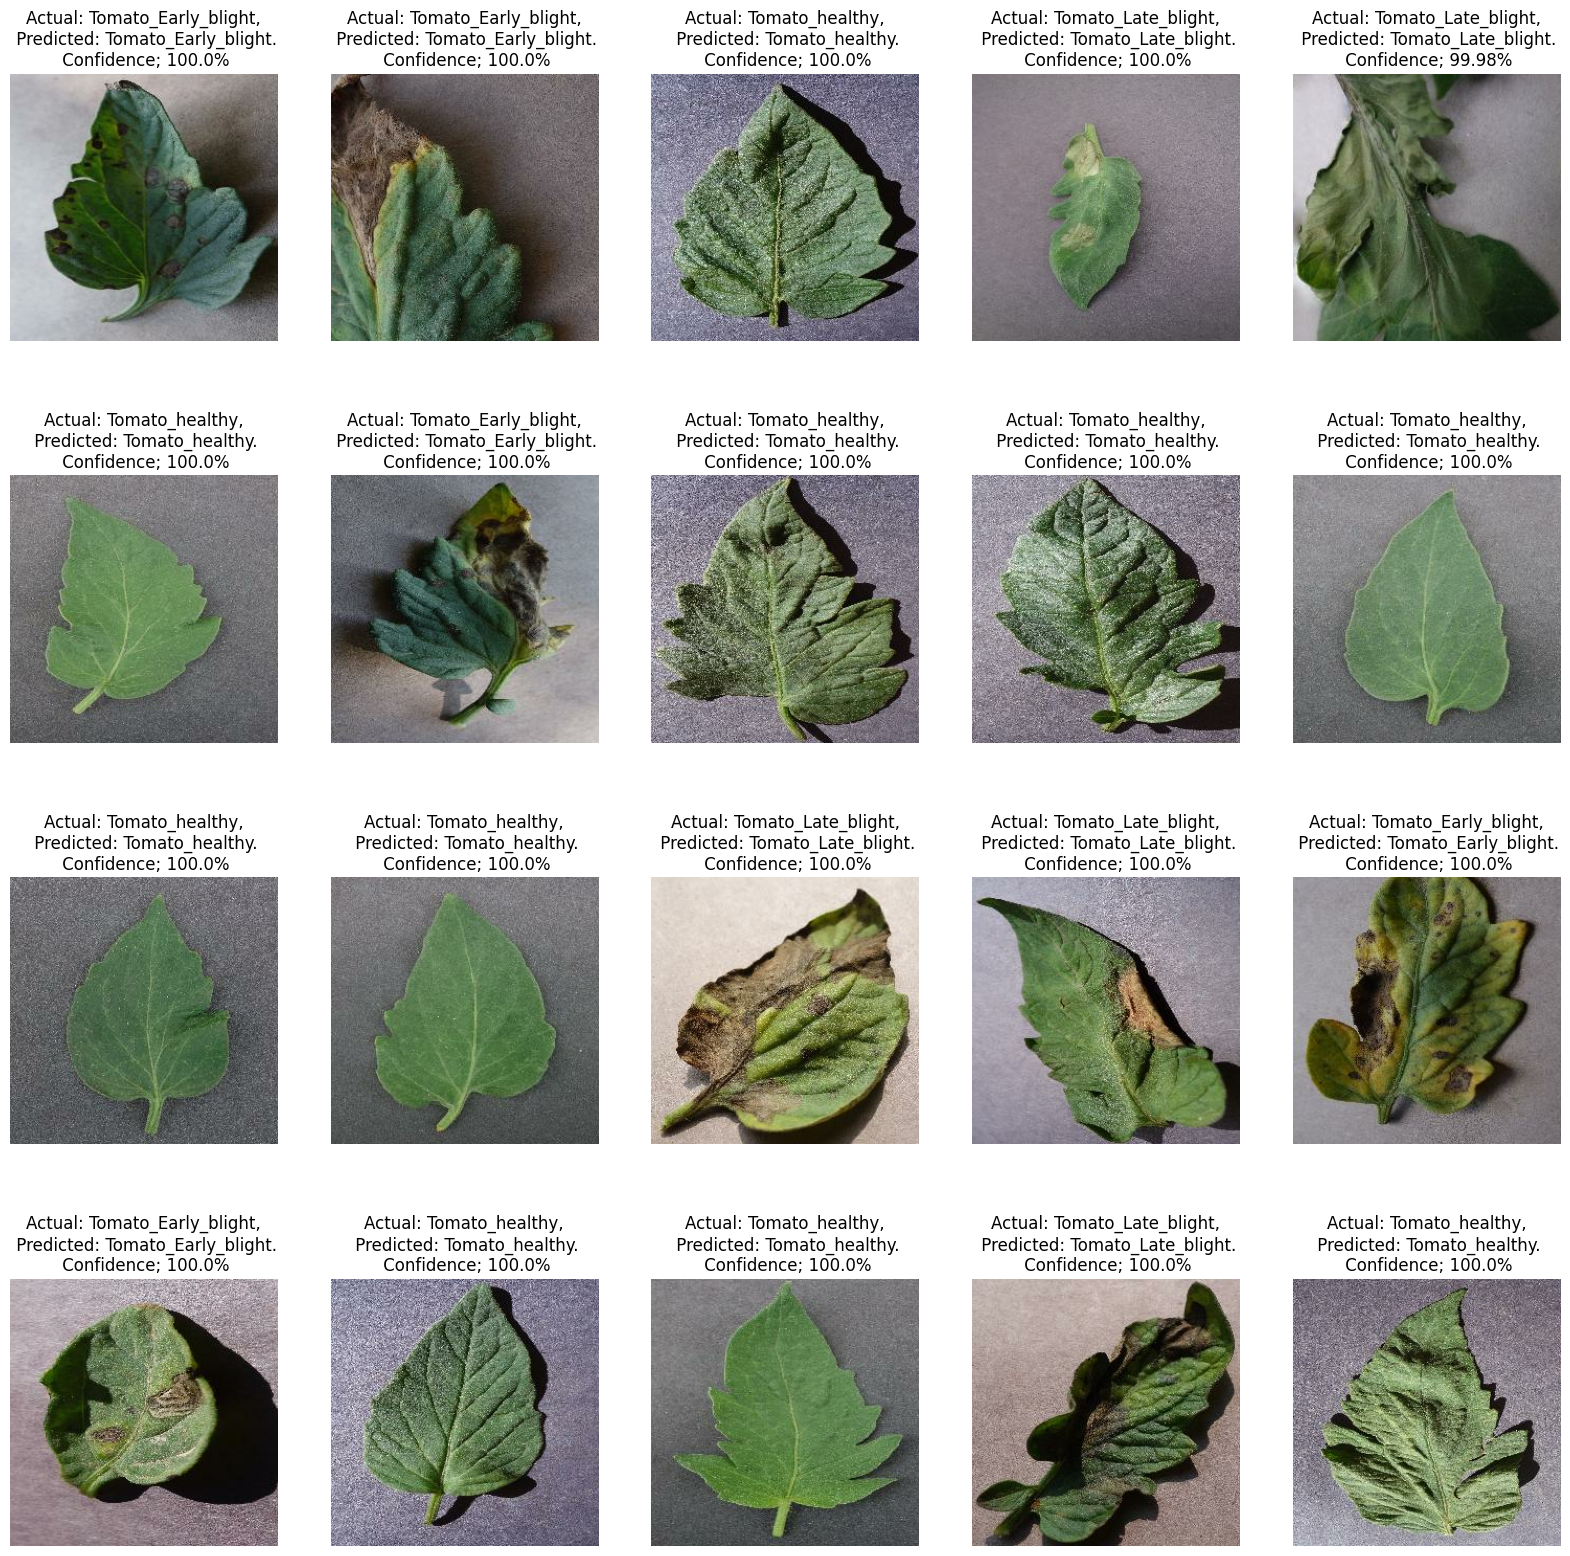

In [48]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence; {confidence}%")

        plt.axis("off")

In [50]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
